In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
os.chdir("C:/Users/claud/OneDrive/Escritorio/Praktikum_Python/Data")

In [2]:
Daten = np.loadtxt("Old_0Fx10_grid.0.dpt")

In [5]:
#Damit der Graphen jetzt auf einer "Nullstrecke" liegt muss man zuerst die gewünschten Werte finden, wo x<1700 und x<1500 ist,
#um die beiden interessanten Höhepunkte auf eine Linie zu stelen. 
#np.where() lifiert nur die indices (Stellen im Array) an den x<1500 bzw. x>1700 ist.
#np.where(x<1500)
#x[1903]
#np.polyfit gibt in einem Array zuerst (0. Stelle) die Steigung und dann (1. Stelle) den Achsenabschnitt an. Diese nutzt man
#dann um eine ganzrationale Funktion 1. Grades zu bestimmen.

def baseLine(D, y):
    x = D[:,0]
    y1 = D[:,y]
    Parameter = np.polyfit([x[1747],x[1903]], [y1[1747], y1[1903]], 1)
    Steigung = Parameter[0]
    Achsenabschnitt = Parameter[1]
    NullGerade = Steigung*x+Achsenabschnitt
    
    return (NullGerade)
print(baseLine(Daten, 50))

[-0.14542509 -0.14528117 -0.14513726 ...  0.22342694  0.22357085
  0.22371477]


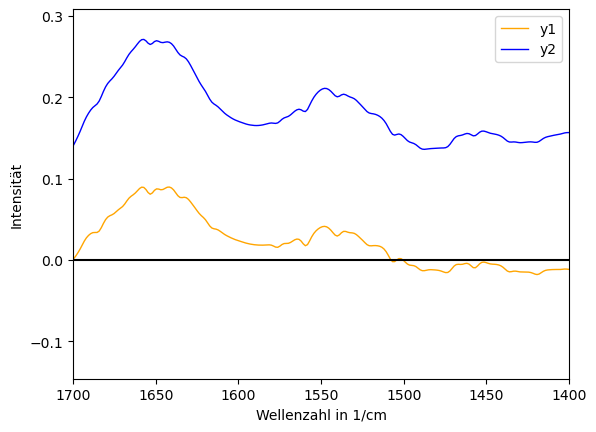

In [6]:
np.shape(Daten)
#Mit [:,0] nimmt man alle Zeilen (erste Angabe, hier alle wegen :) von der 1. Spalte (0) für die x-Koordinate
x = Daten[:,0]
#Damit nimmt man die zur x gehörenden y-Werte von jeweils der 51 und 41 Spalte.
y1 = Daten[:,50]
y2 = Daten[:,40]
#Mit plt.plot kann man mit den angegeben Werten eine Funktion ausgeben lassen. Hier mit den x und y Werten
plt.plot(x,y1-baseLine(Daten, 50), c="orange", lw=1, ls="solid", label="y1")
plt.plot(x,y2, c="blue", lw=1, ls="solid", label="y2")
#Hiermit schneidet man den Graphen zurecht.
plt.xlim(1700,1400)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, color="black")
